Reference for training YOLOv8 model: https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-classification-on-custom-dataset.ipynb

In [ ]:
# Go to Edit -> Notebook settings -> Hardware accelerator, use GPU.

!nvidia-smi # Check GPU status

Thu May 25 05:02:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os           # OS library for navigating directories
HOME = os.getcwd()  # Set home directory
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20 # Install YOLOv8

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# After you have created a dataset on RoboFlow

!mkdir {HOME}/datasets # Make directory called 'datasets'

In [ ]:
%cd {HOME}/datasets

/content/datasets


In [ ]:
!pip install roboflow --quiet

# Download our data set
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gBm9zSZV7ZmrCZb2LBum")
project = rf.workspace("kmitl-c1abk").project("thai-baht-detection")
dataset = project.version(3).download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Thai-Baht-Detection-3 in yolov8:: 100%|██████████| 3812/3812 [00:00<00:00, 4109.80it/s]


In [ ]:
# Training
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=80 imgsz=800 plots=True  # Set epochs

/content
100% 21.5M/21.5M [00:01<00:00, 15.2MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Thai-Baht-Detection-3/data.yaml, epochs=80, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, 

In [ ]:
!ls {HOME}/runs/detect/train/  # Check files in 'train' directory

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch7280.jpg
events.out.tfevents.1684991179.c40feca35fe9.1547.0  train_batch7281.jpg
F1_curve.png					    train_batch7282.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


In [ ]:
%cd {HOME} 
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)     # Plot confusion matrix

/content


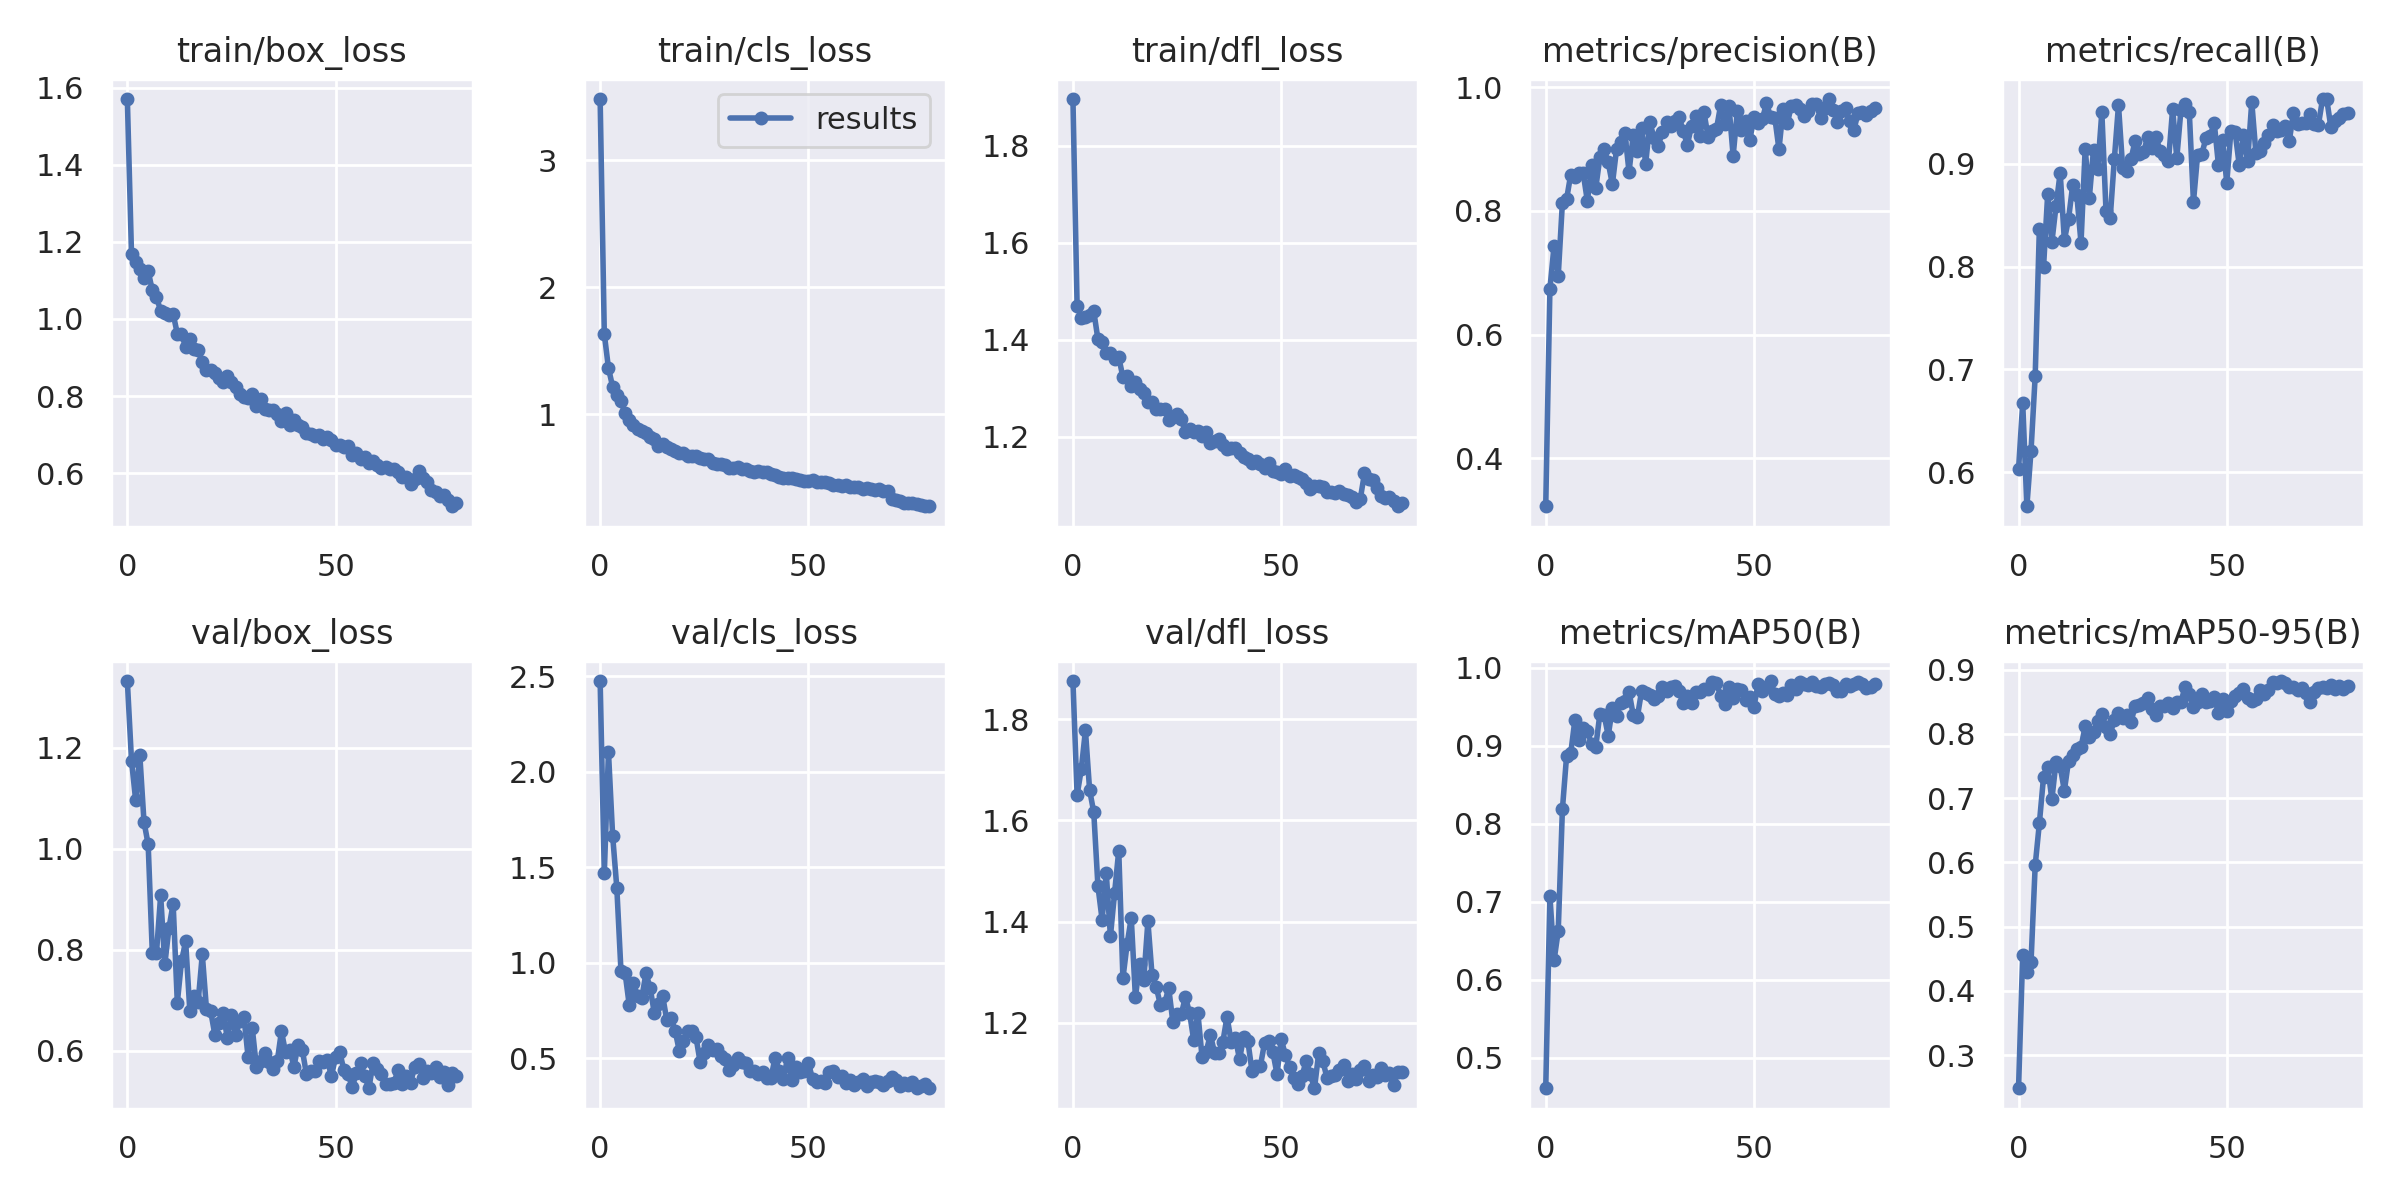

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600) # Plot visualizations

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)  # Print predicted validation datasets

In [ ]:
# Check final validation of model, summarized.
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-25 06:35:19.227897: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 06:35:20.166905: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Thai-Baht-Detection-3/valid/labels.cache... 77 images, 0 backgrounds, 0 corrupt: 100% 77/77 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:04<00:00,  1.08it/s]
                   all         77        201      0.956      0.931      0.977      0.881
                 1000B         77

In [ ]:
# Deploy and save weights to Roboflow (for easy access)
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/kmitl-c1abk/thai-baht-detection/deploy/3
Share your model with the world at: https://universe.roboflow.com/kmitl-c1abk/thai-baht-detection/model/3


In [ ]:
# Zip all files related to our training
!zip -r /content/file.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/state_dict.pt (deflated 8%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 7%)
  adding: content/runs/detect/train/args.yaml (deflated 51%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/train_batch7281.jpg (deflated 15%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 13%)
  adding: content/runs/detect/train/F1_curve.png (deflated 7%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 5%)
  adding: content/runs/detect/train/results.csv (deflated 85%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 9%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 7%)
  adding: cont

In [ ]:
# Download the zipped files
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Deploy onto Nvidia Jetson Nano

In [ ]:
import cv2
import argparse

from ultralytics import YOLO
import supervision as sv
import numpy as np

def parse_arguments() -> argparse.Namespace:
    parser = argparse.ArgumentParser(description="YOLOv8 live")
    parser.add_argument(
        "--webcam-resolution", 
        default=[640, 480], 
        nargs=2, 
        type=int
    )
    args = parser.parse_args()
    return args


def main():
    args = parse_arguments()
    frame_width, frame_height = args.webcam_resolution

    cap = cv2.VideoCapture(0)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, frame_width)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_height)

    model = YOLO("best.pt")

    box_annotator = sv.BoxAnnotator(
        thickness=2,
        text_thickness=2,
        text_scale=1
    )

    while True:
        ret, frame = cap.read()

        result = model(frame, agnostic_nms=True)[0]
        detections = sv.Detections.from_yolov8(result)
        labels = [
            f"{model.model.names[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, _
            in detections
        ]
        frame = box_annotator.annotate(
            scene=frame, 
            detections=detections, 
            labels=labels
        )

        cv2.imshow("Money Counter", frame)

        if (cv2.waitKey(30) == ord("q")):
            break

if __name__ == "__main__":
    main()
